In [1]:
# first have 6 rooms, and start at n=3
import numpy as np

In [2]:
# prob entering room 0 from the left of right
def calc_left_right_prob(start, rooms, samples=10_000):
    sol = [0, 0]
    for _ in range(samples):
        room = start
        while room != 0 and room != rooms:
            # generate a random int, either 0 or 1 with equal probability
            left = np.random.randint(0, 2)
            room = room - 1 if left else room + 1
            
        if room == 0:
            sol[0] += 1
        else:
            sol[1] += 1
            
    # return the probabilities
    return sol[0]/sum(sol), sol[1]/sum(sol)

calc_left_right_prob(40, 100, samples=500)
# it seems like the answer is (Rooms - Jumps / Rooms)

(0.588, 0.412)

In [3]:
# how many jumps should we take to reach room 0 with at least 50% probability?
def do_jumps(jumps, room, rooms):
    for jump in range(jumps):
        left = np.random.randint(0, 2)
        room = room - 1 if left else room + 1
        
        # we hit the end, return 1
        if room == 0 or room == rooms:
            return 1
    
    return 0

def similate_jumps(jumps, start, rooms, samples=500):
    reached = 0
    for _ in range(samples):
        reached += do_jumps(jumps, start, rooms)
        
    return reached / samples

In [4]:
similate_jumps(10, 3, 6, 100_000)
# ~.685, 137/200

0.68465

In [5]:
similate_jumps(10, 2, 6, 100_000)
# ~.7625 61/80

0.76247

In [6]:
iters = 5
acc = 0
for _ in range(iters):
    acc += similate_jumps(10, 1, 6, 100_000)
print(acc/iters)

0.8420759999999999


In [7]:
for _ in range(5):
    print(similate_jumps(1800, 40, 100, 2_500))

0.4888
0.5024
0.4948
0.5064
0.4944


In [8]:
# what is the average number of rooms traversed as we increase jumps by 1
def incremental_jump(jumps, start):
    room = start
    for jump in range(jumps):
        left = np.random.randint(0, 2)
        room = room - 1 if left else room + 1
    return abs(room - start)
    
def simulate_inc_jump(jumps, start=50, samples=10_000):
    acc = 0
    for _ in range(samples):
        acc += incremental_jump(jumps, start)
        
    return acc / samples

In [9]:
simulate_inc_jump(30)

4.381

In [10]:
for jumps in range(1, 29):
    print(simulate_inc_jump(jumps))

1.0
1.0028
1.5006
1.4888
1.9076
1.8758
2.1668
2.1698
2.4634
2.4558
2.7312
2.6652
2.9328
2.9392
3.1256
3.1466
3.3692
3.3454
3.5132
3.5232
3.7
3.696
3.8886
3.8492
4.0144
4.0246
4.1654
4.167


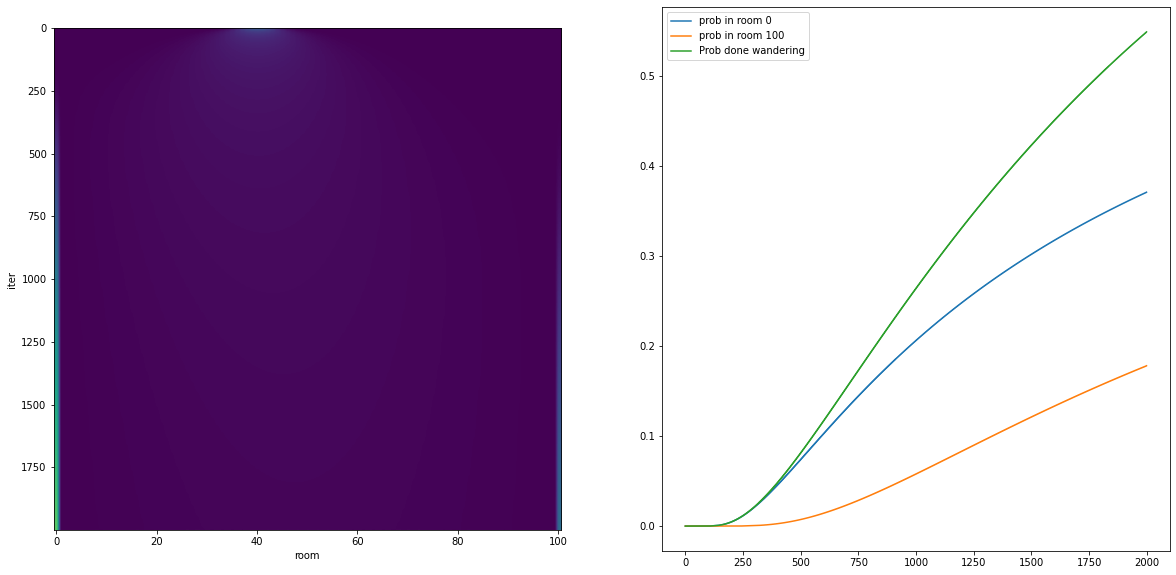

In [11]:
import numpy
import pylab

size = 100
numiters=2000

M = numpy.mat(numpy.zeros([size+1,size+1]))
M[0,0]=M[size,size]=1
for i in range(1,size):
    M[i-1,i]=M[i+1,i]=0.5

p=numpy.mat(numpy.zeros([size+1,1]))
p[int(size*0.4),0]=1

history=[]
for iter in range(numiters):
    p = numpy.dot(M,p)
    history.append( numpy.array(p)[:,0] )

history = numpy.array(history)

pylab.figure(figsize=[20,10])
pylab.subplot(1,2,1)
pylab.imshow(history, aspect=size/numiters)
pylab.ylabel("iter")
pylab.xlabel("room")
pylab.subplot(1,2,2)
pylab.plot(history[:,0], label="prob in room 0")
pylab.plot(history[:,-1], label="prob in room 100")
pylab.plot(history[:,0] + history[:,-1], label="Prob done wandering")
pylab.legend()

In [12]:
"""
matrix([[1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ]])
"""

'\nmatrix([[1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],\n        [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],\n        [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],\n        [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],\n        [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],\n        [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],\n        [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],\n        [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],\n        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],\n        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],\n        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ]])\n'